# **RECOMMENDATION SYSTEM BASED ON CLUSTERING**

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans

**DataSet**

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/ML/recommendation system/spotify_dataset.csv')
data.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


**Preprocessing**

In [3]:
data.isnull().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

In [4]:
data.dtypes

Index                         int64
Highest Charting Position     int64
Number of Times Charted       int64
Week of Highest Charting     object
Song Name                    object
Streams                      object
Artist                       object
Artist Followers             object
Song ID                      object
Genre                        object
Release Date                 object
Weeks Charted                object
Popularity                   object
Danceability                 object
Energy                       object
Loudness                     object
Speechiness                  object
Acousticness                 object
Liveness                     object
Tempo                        object
Duration (ms)                object
Valence                      object
Chord                        object
dtype: object

converting to numeric

In [5]:
#to_numeric  --to convert to numeric form or float
#errors='coerce'--to convert non numerical values to nan values
data['Artist Followers']=pd.to_numeric(data['Artist Followers'],errors='coerce')
data['Popularity']=pd.to_numeric(data['Popularity'],errors='coerce')
data['Danceability']=pd.to_numeric(data['Danceability'],errors='coerce')
data['Energy']=pd.to_numeric(data['Energy'],errors='coerce')
data['Loudness']=pd.to_numeric(data['Loudness'],errors='coerce')
data['Speechiness']=pd.to_numeric(data['Speechiness'],errors='coerce')
data['Acousticness']=pd.to_numeric(data['Acousticness'],errors='coerce')
data['Liveness']=pd.to_numeric(data['Liveness'],errors='coerce')
data['Tempo']=pd.to_numeric(data['Tempo'],errors='coerce')
data['Duration (ms)']=pd.to_numeric(data['Duration (ms)'],errors='coerce')
data['Valence']=pd.to_numeric(data['Valence'],errors='coerce')


converting of streams

In [6]:
data['Streams'][0]

'48,633,449'

In [7]:
data['Streams']=pd.to_numeric(data['Streams'].str.replace(",", ""))

In [8]:
data['Release Date']=pd.to_datetime(data['Release Date'],infer_datetime_format=True,errors='coerce')
data['year']=data['Release Date'].dt.year

data=data.drop('Release Date',axis=1)

In [9]:
data.dtypes

Index                          int64
Highest Charting Position      int64
Number of Times Charted        int64
Week of Highest Charting      object
Song Name                     object
Streams                        int64
Artist                        object
Artist Followers             float64
Song ID                       object
Genre                         object
Weeks Charted                 object
Popularity                   float64
Danceability                 float64
Energy                       float64
Loudness                     float64
Speechiness                  float64
Acousticness                 float64
Liveness                     float64
Tempo                        float64
Duration (ms)                float64
Valence                      float64
Chord                         object
year                         float64
dtype: object

In [10]:
data.isnull().sum()

Index                         0
Highest Charting Position     0
Number of Times Charted       0
Week of Highest Charting      0
Song Name                     0
Streams                       0
Artist                        0
Artist Followers             11
Song ID                       0
Genre                         0
Weeks Charted                 0
Popularity                   11
Danceability                 11
Energy                       11
Loudness                     11
Speechiness                  11
Acousticness                 11
Liveness                     11
Tempo                        11
Duration (ms)                11
Valence                      11
Chord                         0
year                         11
dtype: int64

Dropping null values

In [11]:
data=data.dropna()
data.isnull().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
year                         0
dtype: int64

Saving song names before removing from dataframe

In [12]:
Song_Name=pd.DataFrame(data['Song Name'])

In [13]:
df=data.drop(['Index','Highest Charting Position','Number of Times Charted','Week of Highest Charting', 
            'Song Name','Artist Followers','Song ID','Weeks Charted','Duration (ms)'],axis=1)
df.head(2)

,Streams,Artist,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Chord,year
0,48633449,Måneskin,"['indie rock italiano', 'italian pop']",100.0,0.714,0.800,-4.808,0.0504,0.1270,0.359,134.002,0.589,B,2017.0
1,47248719,The Kid LAROI,['australian hip hop'],99.0,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,0.478,C#/Db,2021.0


Label encoding

In [14]:
le_Artist =LabelEncoder()
le_Genre =LabelEncoder()
le_Chord =LabelEncoder()

df['Artist'] =le_Artist.fit_transform(df['Artist'])
df['Genre'] =le_Genre.fit_transform(df['Genre'])  
df['Chord'] =le_Chord.fit_transform(df['Chord'])

**Scaling**

In [15]:
scaler=MinMaxScaler()
df1=pd.DataFrame((scaler.fit_transform(df)),columns=df.columns)
df.head(2)

,Streams,Artist,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Chord,year
0,48633449,469,276,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.359,134.002,0.589,2,2017.0
1,47248719,643,63,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,0.478,4,2021.0


**Correlation**

<Axes: >

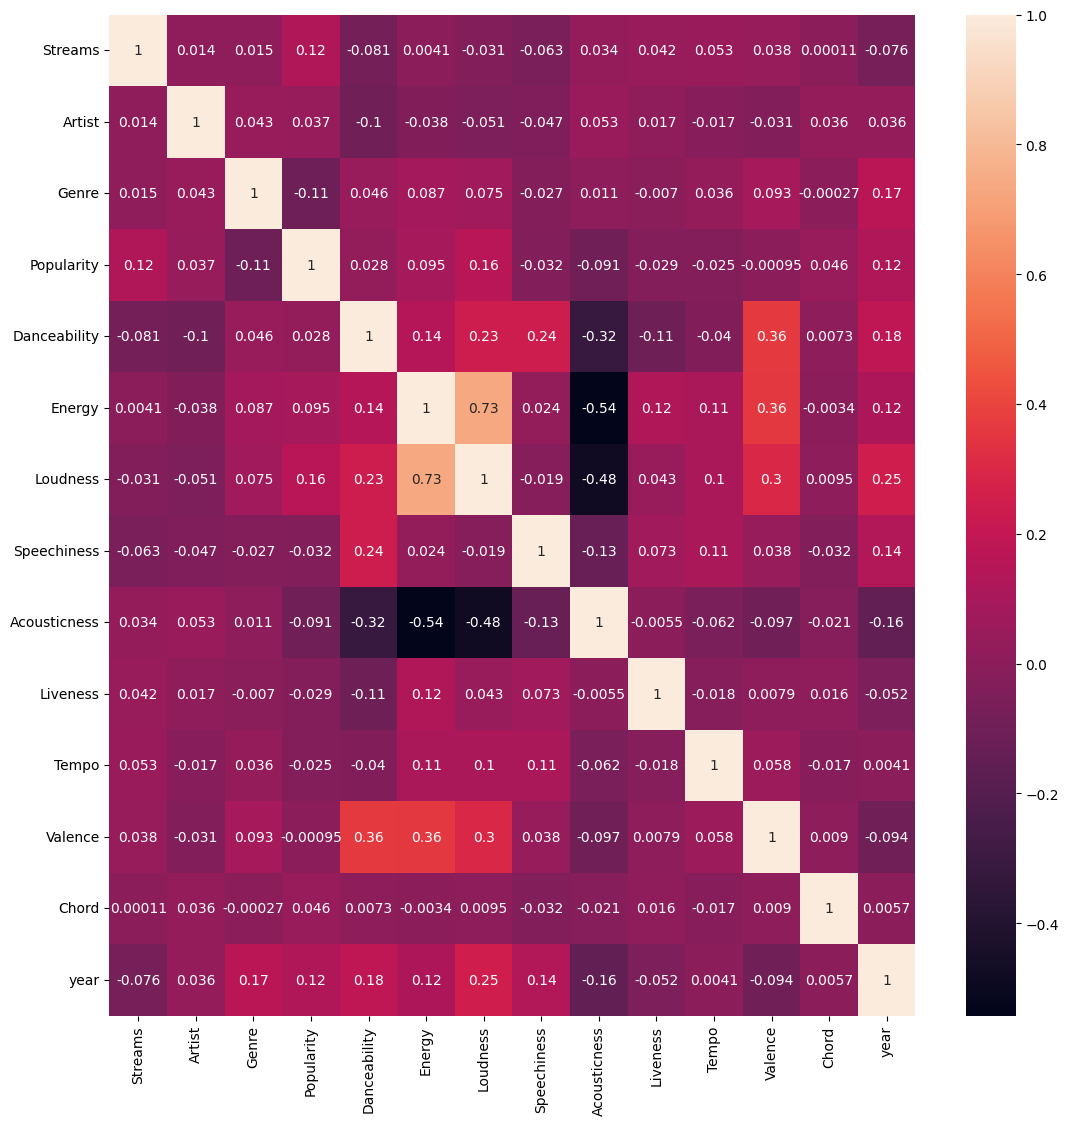

In [16]:
c=df.corr()
plt.figure(figsize=[13,13])
sns.heatmap(c,annot=True)

**Content-based Filtering using KMeans clustering**

In [17]:
sse=[]
for i in range(2,50):
    km=KMeans(n_clusters=i)
    km.fit(df)
    sse.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

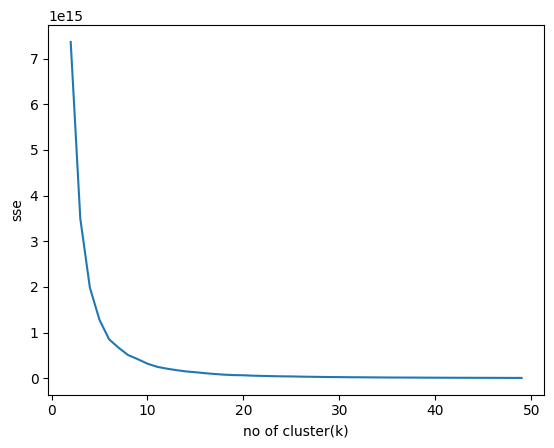

In [18]:
plt.xlabel('no of cluster(k)')
plt.ylabel('sse')
plt.plot(range(2, 50), sse[:])

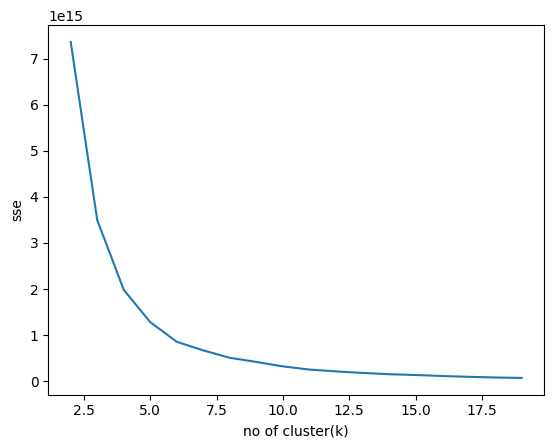

In [19]:
plt.xlabel('no of cluster(k)')
plt.ylabel('sse')
plt.plot(range(2, 20), sse[:18])

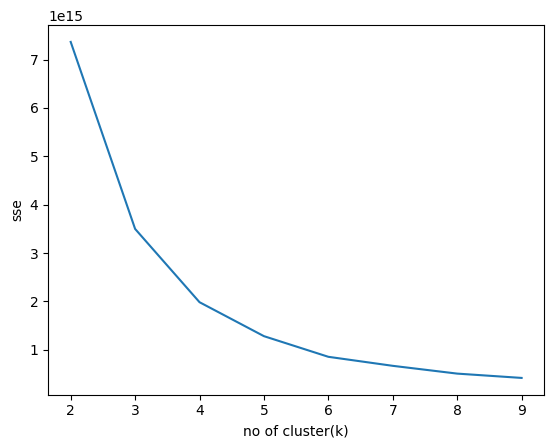

In [20]:
plt.xlabel('no of cluster(k)')
plt.ylabel('sse')
plt.plot(range(2, 10), sse[:8])

In [21]:
km_model =KMeans(n_clusters=6)
prediction =km_model.fit_predict(df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
km_model.cluster_centers_

array([[ 5.08134949e+06,  3.52492223e+02,  2.25191217e+02,
         7.03851784e+01,  7.00928637e-01,  6.36417200e-01,
        -6.20233303e+00,  1.25830009e-01,  2.38570967e-01,
         1.74361299e-01,  1.23134318e+02,  5.14460750e-01,
         5.36779506e+00,  2.01890485e+03],
       [ 1.01054760e+07,  3.31178862e+02,  2.17520325e+02,
         6.90000000e+01,  6.65065041e-01,  6.44739837e-01,
        -6.43116260e+00,  1.10756098e-01,  2.57721751e-01,
         2.08070732e-01,  1.23767813e+02,  5.24317886e-01,
         5.17073171e+00,  2.01713008e+03],
       [ 4.34610458e+07,  4.53750000e+02,  2.66500000e+02,
         9.90000000e+01,  6.69000000e-01,  7.81250000e-01,
        -4.76200000e+00,  7.18750000e-02,  1.36800000e-01,
         2.27725000e-01,  1.49221000e+02,  5.86500000e-01,
         2.00000000e+00,  2.02000000e+03],
       [ 1.59079415e+07,  3.96514286e+02,  2.28857143e+02,
         7.86285714e+01,  6.21085714e-01,  5.74228571e-01,
        -7.40365714e+00,  9.20742857e-02,  4.

Adding cluster numbers to DataSet

In [23]:
df['clusters']=prediction
df.head(2)

,Streams,Artist,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Chord,year,clusters
0,48633449,469,276,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.359,134.002,0.589,2,2017.0,2
1,47248719,643,63,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,0.478,4,2021.0,2


Adding song names

In [24]:
df['Song Name']=Song_Name
df.head(2)

,Streams,Artist,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Valence,Chord,year,clusters,Song Name
0,48633449,469,276,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.359,134.002,0.589,2,2017.0,2,Beggin'
1,47248719,643,63,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,0.478,4,2021.0,2,STAY (with Justin Bieber)


**Prediction**

In [41]:
var='good 4 u'
column=df[df['Song Name']==var]
cl_data=column['clusters']
cl_list=list(cl_data)
cl_number=cl_list[0]
cl_data=df[df['clusters']==cl_number]
cl_data2=pd.DataFrame(cl_data['Song Name'])
final=list(cl_data2['Song Name'])
final

["Beggin'", 'STAY (with Justin Bieber)', 'good 4 u', 'Bad Habits']

In [40]:
data['Song Name']

0                                  Beggin'
1                STAY (with Justin Bieber)
2                                 good 4 u
3                               Bad Habits
4        INDUSTRY BABY (feat. Jack Harlow)
                       ...                
1551                             New Rules
1552                    Cheirosa - Ao Vivo
1553             Havana (feat. Young Thug)
1554            Surtada - Remix Brega Funk
1555    Lover (Remix) [feat. Shawn Mendes]
Name: Song Name, Length: 1545, dtype: object

In [37]:
def predict(song):
  var=song
  column=df[df['Song Name']==var]
  cl_data=column['clusters']
  cl_list=list(cl_data)
  cl_number=cl_list[0]
  cl_data=df[df['clusters']==cl_number]
  cl_data2=pd.DataFrame(cl_data['Song Name'])
  final=list(cl_data2['Song Name'])
  print(final)
    

**Saving the model**

In [42]:
import joblib
joblib.dump(prediction,'rec_model')

['rec_model']